### Predict crime, with Keras in Python

In [1]:
# Import libraries
import os
import pandas            as pd
import seaborn           as sns
import numpy             as np
import matplotlib.pyplot as plt
import sklearn.metrics
import sklearn.metrics.pairwise

from pandas   import read_csv
from datetime import datetime
from numpy    import reshape
from sklearn  import preprocessing




#### Define function read time

In [2]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M:%S')

#### Read crime data

In [3]:
dataset = read_csv('../data/val_crime_gridnum_closestpoi.csv', parse_dates = [['crime_date','crime_time']], index_col=0, date_parser=parse)

In [4]:
dataset.head()

,crime_id,crime_type,muni,year,month,week,day,week_day,week_day_name,crime_hour,...,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,grid_lon,grid_lat
crime_date_crime_time,,,,,,,,,,,,,,,,,,,,,
2012-11-03 19:24:41,v19729,Agresion,Valencia,2012,11,44,308,6,Friday,19,...,17.43820,4747.5434,4587.8138,4179.4637,3955.3321,3614.2947,3820.6677,8,-0.389801,39.530316
2016-04-09 13:50:02,v46325,Sustraccion,Valencia,2016,4,15,100,6,Friday,13,...,6.82230,4750.8043,4590.5371,4184.4217,3945.2123,3614.8454,3827.7238,8,-0.389801,39.530316
2016-09-30 11:29:09,v50637,Sustraccion,Valencia,2016,9,40,274,5,Thursday,11,...,16.31740,4755.5642,4595.0683,4189.8992,3943.6966,3618.4390,3834.0585,8,-0.389801,39.530316
2019-11-12 09:06:17,v82815,Sustraccion,Valencia,2019,11,46,316,2,Monday,9,...,7.84373,4750.1360,4590.1877,4182.7390,3952.2821,3615.7757,3824.7780,8,-0.389801,39.530316
2010-04-29 15:29:24,v1187,Agresion,Valencia,2010,4,17,119,4,Wednesday,15,...,37.54220,4839.5899,4684.4022,4257.7843,4137.6026,3729.0027,3880.8419,9,-0.384235,39.530316


#### Verify types columns

In [5]:
dataset.dtypes

crime_id            object
crime_type          object
muni                object
year                 int64
month                int64
week                 int64
day                  int64
week_day             int64
week_day_name       object
crime_hour           int64
crime_lon          float64
crime_lat          float64
atm_dist           float64
bank_dist          float64
bar_dist           float64
cafe_dist          float64
industrial_dist    float64
market_dist        float64
nightclub_dist     float64
police_dist        float64
pub_dist           float64
restaurant_dist    float64
taxi_dist          float64
grid_id              int64
grid_lon           float64
grid_lat           float64
dtype: object

#### We save the data in a new variable in order not to lose the original data

In [6]:
d_copy = dataset

### Statistics

In [7]:
d_copy.describe()

,year,month,week,day,week_day,crime_hour,crime_lon,crime_lat,atm_dist,bank_dist,...,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,grid_lon,grid_lat
count,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,...,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000,90247.000000
mean,2015.395127,6.536915,26.654991,183.550877,4.322504,12.521159,-0.372372,39.471404,790.227621,305.314730,...,675.232510,1008.414058,930.501441,875.246001,496.471830,223.875308,717.380553,210.777699,-0.372398,39.471334
std,3.041370,3.309951,14.457176,101.207035,2.043508,7.444000,0.021595,0.014917,594.453864,288.719598,...,623.298757,740.182323,679.212290,626.190985,452.372564,257.024583,481.201107,51.554858,0.021707,0.015017
min,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.429604,39.415417,1.549093,1.712670,...,0.100031,1.821200,1.189390,0.687878,1.488920,0.427386,2.441030,8.000000,-0.428762,39.418054
25%,2013.000000,4.000000,14.000000,96.000000,3.000000,5.000000,-0.388284,39.461933,380.534983,133.907500,...,268.355100,487.873600,468.163950,455.810200,190.149900,73.401100,393.438150,173.000000,-0.389801,39.459414
50%,2016.000000,7.000000,27.000000,187.000000,5.000000,14.000000,-0.374947,39.469913,630.867281,228.002800,...,509.564200,869.516500,810.185400,706.093700,383.330000,147.797000,651.643500,215.000000,-0.373103,39.471231
75%,2018.000000,9.000000,38.000000,266.000000,6.000000,19.000000,-0.359254,39.482532,986.896822,384.706000,...,909.889700,1263.404900,1256.269400,1105.625100,665.598800,272.288400,931.082700,248.000000,-0.361972,39.483048
max,2020.000000,12.000000,53.000000,366.000000,7.000000,23.000000,-0.320846,39.530956,4838.847387,3411.537100,...,4703.861200,4855.407100,4700.566700,4765.745000,4168.869000,3746.536300,4284.239100,398.000000,-0.323011,39.530316


In [8]:
d_copy.isnull().sum()

crime_id           0
crime_type         0
muni               0
year               0
month              0
week               0
day                0
week_day           0
week_day_name      0
crime_hour         0
crime_lon          0
crime_lat          0
atm_dist           0
bank_dist          0
bar_dist           0
cafe_dist          0
industrial_dist    0
market_dist        0
nightclub_dist     0
police_dist        0
pub_dist           0
restaurant_dist    0
taxi_dist          0
grid_id            0
grid_lon           0
grid_lat           0
dtype: int64

In [9]:
a = d_copy['grid_id'].value_counts()
a.sort_index(ascending=True)


8       4
9      50
28      1
29      4
48      7
       ..
378    16
393    10
396     2
397    23
398    77
Name: grid_id, Length: 240, dtype: int64

In [10]:
a.sort_values()

162       1
90        1
282       1
66        1
325       1
       ... 
230    1877
210    1940
251    2057
252    2121
131    2240
Name: grid_id, Length: 240, dtype: int64

In [11]:
print(a[a<10].count())

54


### Data Visualization

c:\Users\danie\anaconda3\envs\dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


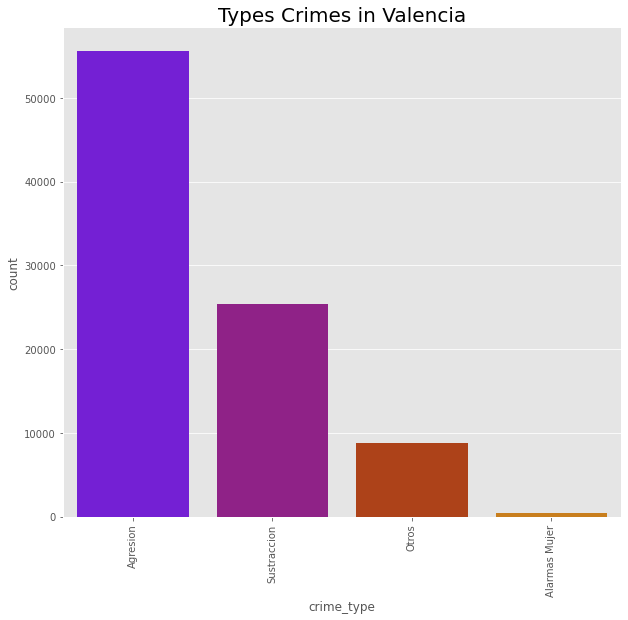

In [12]:
# Different categories of type crime

plt.rcParams['figure.figsize'] = (10, 9)
plt.style.use('ggplot')

sns.countplot(d_copy['crime_type'], palette = 'gnuplot')
plt.title('Types Crimes in Valencia', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

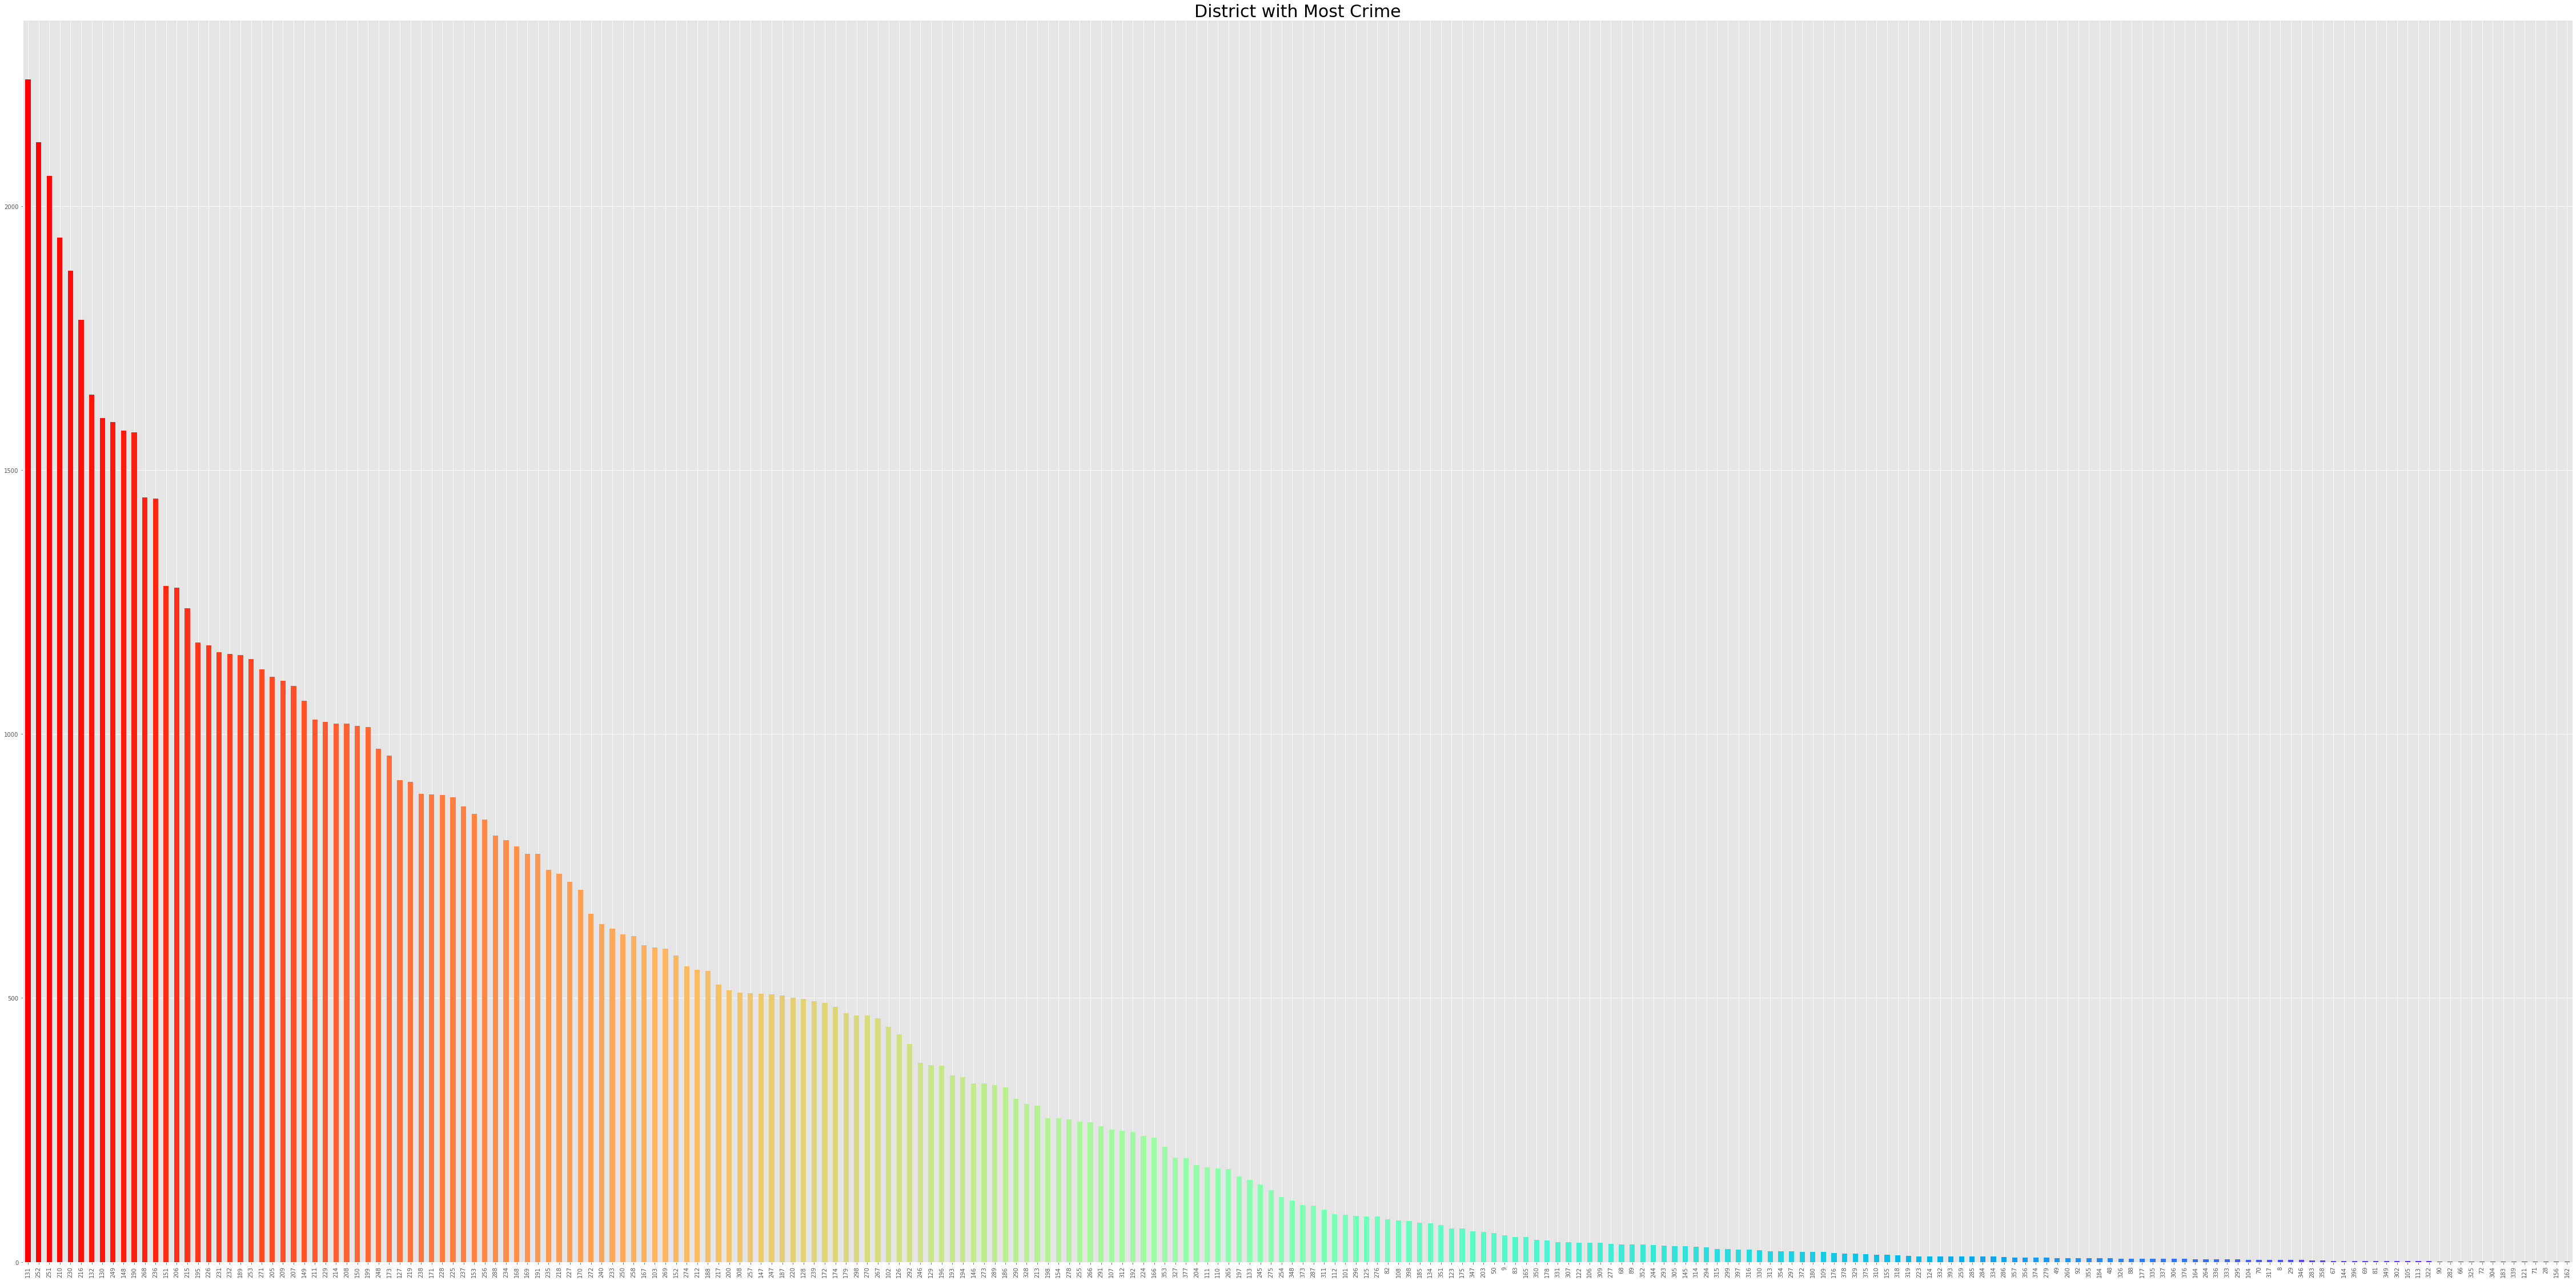

In [13]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (80, 40)
plt.style.use('ggplot')

color = plt.cm.rainbow_r(np.linspace(0, 1, 240))
d_copy['grid_id'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

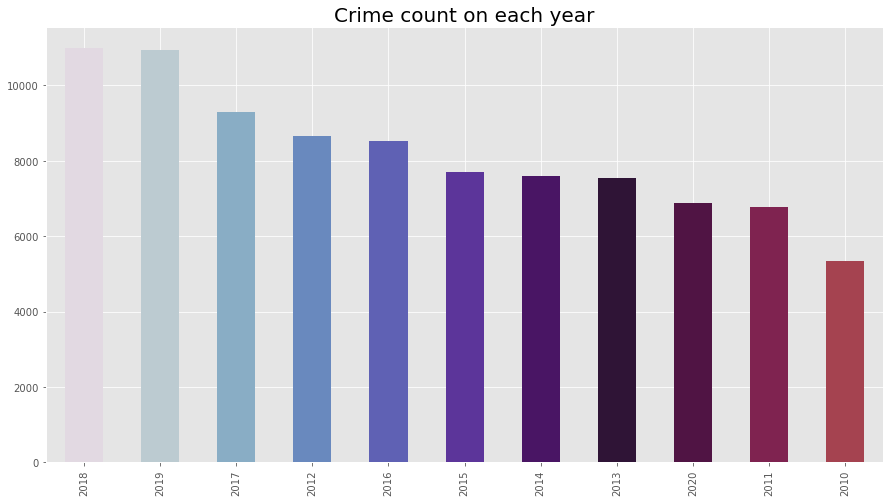

In [14]:
# Regions with count of crimes for year

plt.style.use('ggplot')

color = plt.cm.twilight(np.linspace(0, 1, 15))
d_copy['year'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each year',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

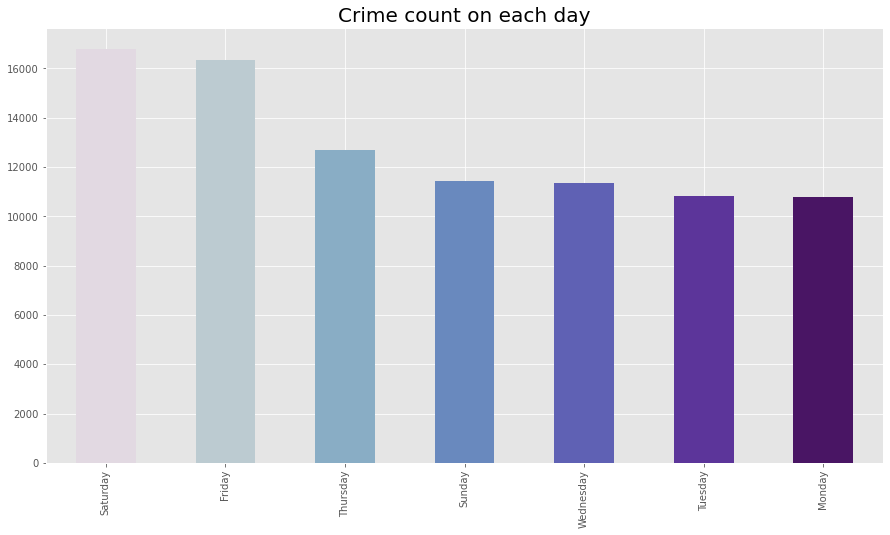

In [15]:

# Regions with count of crimes for day

plt.style.use('ggplot')

color = plt.cm.twilight(np.linspace(0, 1, 15))
d_copy['week_day_name'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Crime count on each day',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

c:\Users\danie\anaconda3\envs\dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


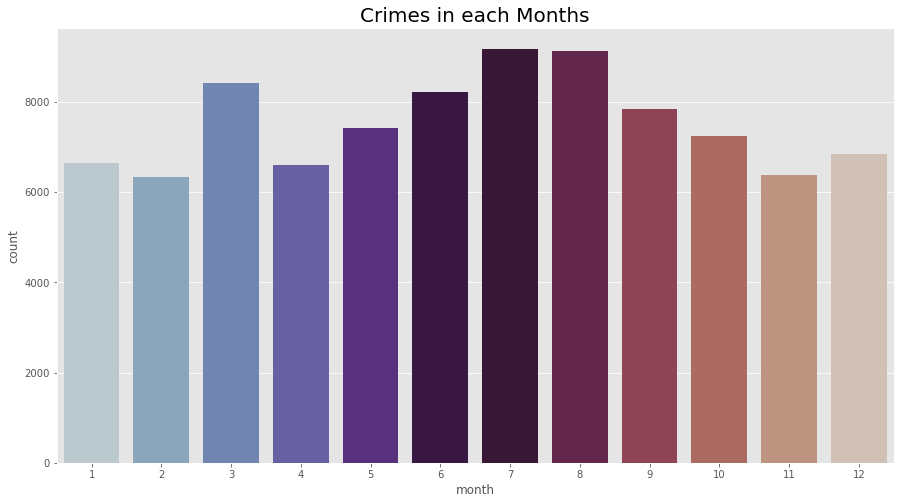

In [16]:
# Regions with count of crimes for month

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(d_copy['month'], palette = 'twilight',)
plt.title('Crimes in each Months', fontsize = 20)
plt.show()

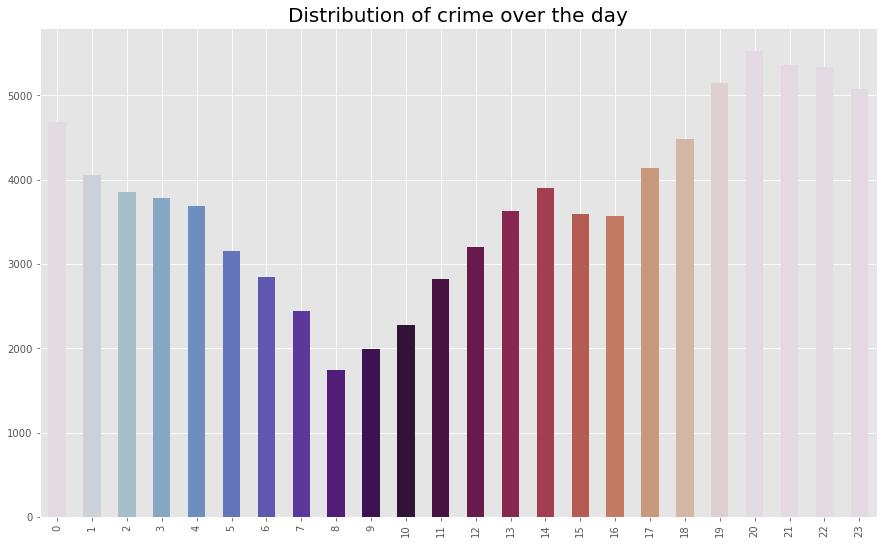

In [17]:
# Checking the time at which crime occurs mostly

import warnings
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
d_copy['crime_hour'].value_counts().sort_index().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [18]:
d_copy_ = d_copy

#### Once the types of crimes have been checked, let's transform them into numerical values, this process is known as data normalization, we can apply a normalization to columns that have very different values, ie the difference between the values of different columns are very high

In [19]:
d_copy_["crime_type"].replace({"Agresion": 1, "Sustraccion": 2, "Otros": 2, "Alarmas Mujer": 2}, inplace=True)

#### We visualize the data header

In [20]:
d_copy_.head()

,crime_id,crime_type,muni,year,month,week,day,week_day,week_day_name,crime_hour,...,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,grid_lon,grid_lat
crime_date_crime_time,,,,,,,,,,,,,,,,,,,,,
2012-11-03 19:24:41,v19729,1,Valencia,2012,11,44,308,6,Friday,19,...,17.43820,4747.5434,4587.8138,4179.4637,3955.3321,3614.2947,3820.6677,8,-0.389801,39.530316
2016-04-09 13:50:02,v46325,2,Valencia,2016,4,15,100,6,Friday,13,...,6.82230,4750.8043,4590.5371,4184.4217,3945.2123,3614.8454,3827.7238,8,-0.389801,39.530316
2016-09-30 11:29:09,v50637,2,Valencia,2016,9,40,274,5,Thursday,11,...,16.31740,4755.5642,4595.0683,4189.8992,3943.6966,3618.4390,3834.0585,8,-0.389801,39.530316
2019-11-12 09:06:17,v82815,2,Valencia,2019,11,46,316,2,Monday,9,...,7.84373,4750.1360,4590.1877,4182.7390,3952.2821,3615.7757,3824.7780,8,-0.389801,39.530316
2010-04-29 15:29:24,v1187,1,Valencia,2010,4,17,119,4,Wednesday,15,...,37.54220,4839.5899,4684.4022,4257.7843,4137.6026,3729.0027,3880.8419,9,-0.384235,39.530316


### We select the characteristics with which we are going to work

In [21]:
d_copy_ = d_copy_[['crime_type', 'crime_lon', 'crime_lat','atm_dist', 'bank_dist', 'bar_dist', 'cafe_dist', 'industrial_dist','market_dist', 'nightclub_dist', 'police_dist', 'pub_dist','restaurant_dist', 'taxi_dist', 'grid_id']]

In [22]:
d_copy_.index.name = 'date'

In [23]:
d_copy_ = d_copy_.sort_index(ascending=True)

In [24]:
d_copy_[d_copy_.index.duplicated()]

,crime_type,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id
date,,,,,,,,,,,,,,,
2012-03-19 06:57:03,2,-0.379654,39.466160,598.000513,125.1431,30.6531,148.04660,538.5129,747.5773,413.7206,531.1987,400.7809,91.2691,197.6894,230
2013-04-20 08:34:05,1,-0.402760,39.469212,1762.197219,48.0799,792.7089,547.79910,972.7598,374.6018,1183.9601,341.9344,748.7157,86.0415,922.6048,206
2014-02-22 19:44:06,1,-0.401489,39.472393,1629.596526,262.2885,843.8469,381.82180,945.7711,711.4978,1120.5158,524.9492,873.7241,147.0667,597.1472,206
2017-05-27 16:35:20,1,-0.354198,39.463661,562.806276,282.8062,262.8374,246.98830,203.0767,251.0388,1623.4592,1380.1563,411.4560,180.6162,298.4951,234
2017-05-28 12:26:53,2,-0.378705,39.465237,536.388562,248.2265,162.0555,264.22390,411.0017,754.1727,288.6730,662.6366,394.0230,188.1267,190.5966,230
2017-08-17 09:19:37,1,-0.369783,39.493935,238.511880,237.5754,857.8042,235.93030,621.6962,1119.6978,1088.7839,500.8922,557.0647,722.1415,139.2902,132
2018-07-30 19:23:05,2,-0.375938,39.469082,303.891260,37.2363,127.0976,74.10690,574.2763,569.0359,504.4933,755.9687,80.8354,40.6288,175.7271,210
2019-03-24 06:54:32,1,-0.404034,39.469231,1888.666596,130.1889,840.8572,665.07310,1099.4784,380.9888,1310.8789,455.8102,637.3794,208.8169,945.3289,205
2019-05-14 06:02:08,1,-0.376621,39.467300,463.645205,68.3953,147.5292,82.19900,420.3750,689.9701,360.9336,754.7970,110.7059,74.9863,82.7055,230


In [25]:
d_copy_.index = d_copy_.index.round('10min')

In [26]:
d_copy_ = d_copy_[~d_copy_.index.duplicated(keep='first')]

In [27]:
d_copy_ = d_copy_.asfreq(freq='10min')

In [28]:
d_copy_

,crime_type,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id
date,,,,,,,,,,,,,,,
2010-01-01 00:40:00,1.0,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0
2010-01-01 00:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,1.0,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0
2020-10-08 20:10:00,1.0,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0
2020-10-08 20:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
d_copy_.fillna(0, inplace=True)

In [30]:
d_copy_['dates'] = d_copy_.index

In [31]:
d_copy_

,crime_type,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,dates
date,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,1.0,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0,2010-01-01 00:40:00
2010-01-01 00:50:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2010-01-01 00:50:00
2010-01-01 01:00:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2010-01-01 01:00:00
2010-01-01 01:10:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2010-01-01 01:10:00
2010-01-01 01:20:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2010-01-01 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,1.0,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0,2020-10-08 20:00:00
2020-10-08 20:10:00,1.0,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0,2020-10-08 20:10:00
2020-10-08 20:20:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2020-10-08 20:20:00


In [32]:
d_copy_['crime_type'].value_counts()

0.0    485921
1.0     49539
2.0     31013
Name: crime_type, dtype: int64

In [33]:
date_time = pd.to_datetime(d_copy_.pop('dates'), format='%Y.%m.%d %H:%M:%S')

In [34]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [35]:
day = 24*60*60
year = (365.2425)*day

d_copy_['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
d_copy_['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
d_copy_['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
d_copy_['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [36]:
d_copy_

,crime_type,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,pub_dist,restaurant_dist,taxi_dist,grid_id,Day sin,Day cos,Year sin,Year cos
date,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,1.0,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,829.9902,1373.0596,39.1007,328.0,-8.715574e-02,9.961947e-01,0.004922,0.999988
2010-01-01 00:50:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-4.361939e-02,9.990482e-01,0.005041,0.999987
2010-01-01 01:00:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-4.416858e-12,1.000000e+00,0.005161,0.999987
2010-01-01 01:10:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,4.361939e-02,9.990482e-01,0.005280,0.999986
2010-01-01 01:20:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,8.715574e-02,9.961947e-01,0.005400,0.999985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,1.0,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,921.5870,53.9071,526.9465,187.0,-1.000000e+00,-7.280707e-13,-0.991255,0.131957
2020-10-08 20:10:00,1.0,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,146.6785,77.9538,114.4244,230.0,-9.990482e-01,4.361939e-02,-0.991240,0.132076
2020-10-08 20:20:00,0.0,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,-9.961947e-01,8.715574e-02,-0.991224,0.132194


In [37]:
d_copy_ = pd.get_dummies(d_copy_, columns=['crime_type'], prefix='crime_type_')

In [38]:
d_copy_

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,...,restaurant_dist,taxi_dist,grid_id,Day sin,Day cos,Year sin,Year cos,crime_type__0.0,crime_type__1.0,crime_type__2.0
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,...,1373.0596,39.1007,328.0,-8.715574e-02,9.961947e-01,0.004922,0.999988,0,1,0
2010-01-01 00:50:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-4.361939e-02,9.990482e-01,0.005041,0.999987,1,0,0
2010-01-01 01:00:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-4.416858e-12,1.000000e+00,0.005161,0.999987,1,0,0
2010-01-01 01:10:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,4.361939e-02,9.990482e-01,0.005280,0.999986,1,0,0
2010-01-01 01:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,8.715574e-02,9.961947e-01,0.005400,0.999985,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,...,53.9071,526.9465,187.0,-1.000000e+00,-7.280707e-13,-0.991255,0.131957,0,1,0
2020-10-08 20:10:00,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,...,77.9538,114.4244,230.0,-9.990482e-01,4.361939e-02,-0.991240,0.132076,0,1,0
2020-10-08 20:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-9.961947e-01,8.715574e-02,-0.991224,0.132194,1,0,0


### Select index train, test, validation

In [41]:
# range train data
len_train = len(d_copy_.loc['2010-01-01':'2019-12-31'])

In [42]:
# range test data
len_test = len(d_copy_.loc['2020-01-01':'2020-01-31'])

In [43]:
# range validation data
len_val = len(d_copy_.loc['2020-02-01':'2020-02-29'])

In [44]:
print(len_train,len_test,len_val)

525884 4464 4176


In [45]:
print(len_train)
print(len_train+len_test)
print(len_train+len_test+1)
print(len_train+len_test+len_val)
print(len_train+len_test+len_val+1)


525884
530348
530349
534524
534525


#### We graph all the variables, to observe the evolution of the variables over time

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [47]:
d_copy_

,crime_lon,crime_lat,atm_dist,bank_dist,bar_dist,cafe_dist,industrial_dist,market_dist,nightclub_dist,police_dist,...,restaurant_dist,taxi_dist,grid_id,Day sin,Day cos,Year sin,Year cos,crime_type__0.0,crime_type__1.0,crime_type__2.0
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:40:00,-0.390685,39.435169,2700.302415,28.2231,38.6437,1221.9344,1010.8148,3270.7254,1387.9167,2690.2438,...,1373.0596,39.1007,328.0,-8.715574e-02,9.961947e-01,0.004922,0.999988,0,1,0
2010-01-01 00:50:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-4.361939e-02,9.990482e-01,0.005041,0.999987,1,0,0
2010-01-01 01:00:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-4.416858e-12,1.000000e+00,0.005161,0.999987,1,0,0
2010-01-01 01:10:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,4.361939e-02,9.990482e-01,0.005280,0.999986,1,0,0
2010-01-01 01:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,8.715574e-02,9.961947e-01,0.005400,0.999985,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-08 20:00:00,-0.394534,39.478477,834.221889,8.5320,41.6437,49.6619,568.8155,1080.2735,705.8942,1087.0397,...,53.9071,526.9465,187.0,-1.000000e+00,-7.280707e-13,-0.991255,0.131957,0,1,0
2020-10-08 20:10:00,-0.377762,39.468197,480.643740,80.5318,78.4483,83.4901,551.3365,566.5323,496.9521,612.5590,...,77.9538,114.4244,230.0,-9.990482e-01,4.361939e-02,-0.991240,0.132076,0,1,0
2020-10-08 20:20:00,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0,-9.961947e-01,8.715574e-02,-0.991224,0.132194,1,0,0


#### Extract values and targets

In [50]:
Values_ML = d_copy_.iloc[:,:-3].values
Values = d_copy_.iloc[:,:-3].values

In [51]:
y = d_copy_.iloc[:,-3:].values
y_ = d_copy_.iloc[:,-3:].values


In [52]:
y

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [53]:
# ensure all data is float
Values_ML = Values_ML.astype('float32')
Values = Values.astype('float32')
Values_ML

array([[-3.9068499e-01,  3.9435169e+01,  2.7003025e+03, ...,
         9.9619472e-01,  4.9218857e-03,  9.9998790e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.9904823e-01,  5.0413478e-03,  9.9998730e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  5.1608104e-03,  9.9998671e-01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         8.7155744e-02, -9.9122387e-01,  1.3219397e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.3052619e-01, -9.9120808e-01,  1.3231237e-01],
       [-3.9070901e-01,  3.9481499e+01,  4.9626794e+02, ...,
         1.7364818e-01, -9.9119228e-01,  1.3243079e-01]], dtype=float32)

In [54]:
def NormalizeMult(data, set_range):
    '''
         Return the normalized data and the maximum and minimum values
    '''
    normalize = np.arange(2*data.shape[1], dtype='float64')
    normalize = normalize.reshape(data.shape[1], 2)
 
    for i in range(0, data.shape[1]):
        if set_range == True:
            list = data[:, i]
            listlow, listhigh = np.percentile(list, [0, 100])
        else:
            if i == 0:
                listlow = -90
                listhigh = 90
            else:
                listlow = -180
                listhigh = 180
 
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
 
        delta = listhigh - listlow
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data, normalize

In [55]:
# normalize features
scaler_ML = MinMaxScaler(feature_range=(0, 1))
Values_ML[:,:] = scaler_ML.fit_transform(Values_ML[:,:])
scaled_ML = Values_ML
scaled_ML

array([[0.09059227, 0.9975769 , 0.5580467 , ..., 0.99809736, 0.50246096,
        0.9999939 ],
       [0.99999994, 0.        , 0.        , ..., 0.9995241 , 0.5025207 ,
        0.9999937 ],
       [0.99999994, 0.        , 0.        , ..., 1.        , 0.5025804 ,
        0.9999933 ],
       ...,
       [0.99999994, 0.        , 0.        , ..., 0.54357785, 0.00438806,
        0.56609696],
       [0.99999994, 0.        , 0.        , ..., 0.5652631 , 0.00439596,
        0.5661562 ],
       [0.09053636, 0.9987489 , 0.10255913, ..., 0.58682406, 0.00440386,
        0.5662154 ]], dtype=float32)

In [56]:
float_values_ml = scaled_ML

In [57]:
print(float_values_ml.shape, y.shape)

(566473, 18) (566473, 3)


In [58]:
X_train, Y_train = float_values_ml[0:len_train,:], y[0:len_train,:]
X_test, Y_test = float_values_ml[len_train:len_train + len_test,:], y[len_train:len_train + len_test,:]
X_val, Y_val = float_values_ml[len_train + len_test:len_train + len_test + len_val,:], y[len_train + len_test:len_train + len_test + len_val,:]

In [59]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape)

(525884, 18) (525884, 3) (4464, 18) (4464, 3) (4176, 18) (4176, 3)


### Baseline

In [61]:
def baseline():
    # Algorithms
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    # fit the model to the training data
    model_Baseline = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                                   random_state=99, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                   min_impurity_split=None, class_weight="balanced")
    model_Baseline.fit(X_train, Y_train)
    
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    num_folds = 5
    seed = 99

    kfold = KFold(n_splits=num_folds, random_state=None)
    results = cross_val_score(model_Baseline, X_test, Y_test, cv=kfold)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    
     # make predictions for test data
    y_pred = model_Baseline.predict(X_test)
    print(type(y_pred))
    #predictions = [round(value) for value in y_pred]
    
    return y_pred, model_Baseline

In [62]:
predictions, model_Baseline = baseline()

Accuracy: 92.204% (1.147%)
<class 'numpy.ndarray'>


In [63]:
from sklearn.metrics import classification_report
predicted = model_Baseline.predict(X_test)
target_names = ['No data','Agresion','Sustracción']

report = classification_report(Y_test, predicted, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     No data       1.00      1.00      1.00      3732
    Agresion       0.55      0.58      0.56       413
 Sustracción       0.42      0.39      0.40       319

   micro avg       0.92      0.92      0.92      4464
   macro avg       0.66      0.66      0.66      4464
weighted avg       0.92      0.92      0.92      4464
 samples avg       0.92      0.92      0.92      4464



In [64]:
print(predicted.shape, Y_test.shape)

(4464, 3) (4464, 3)


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

print('Confusion Matrix')
print(multilabel_confusion_matrix(Y_test, predicted))

Confusion Matrix
[[[ 732    0]
  [   0 3732]]

 [[3857  194]
  [ 175  238]]

 [[3970  175]
  [ 194  125]]]


### Times Series

In [67]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
Values[:,:] = scaler.fit_transform(Values[:,:])
scaled = Values

In [68]:
float_data = scaled

In [69]:
num_classes = 3

In [70]:
x_train, y_train = float_data[0:len_train,:], y[0:len_train]
x_test, y_test = float_data[len_train + 1:len_train + len_test,:], y[len_train + 1:len_train + len_test]
x_val, y_val = float_data[len_train + len_test + 1:len_train + len_test + len_val,:], y[len_train + len_test + 1:len_train + len_test + len_val]

In [71]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape)

(525884, 18) (525884, 3) (4463, 18) (4463, 3) (4175, 18) (4175, 3)


In [72]:
x_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
x_test = X_test.reshape((X_test.shape[0] , 1, X_test.shape[1]))
x_val = X_val.reshape((X_val.shape[0] , 1, X_val.shape[1]))

In [73]:
print(x_train.shape, x_test.shape, x_val.shape)

(525884, 1, 18) (4464, 1, 18) (4176, 1, 18)


### LSTM 

In [78]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, GRU
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Embedding, Input
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD


def lstm():

    model = Sequential()
    model.add(LSTM(10, input_shape=x_train.shape[1:], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(8, input_shape=x_train.shape[1:], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(4, input_shape=x_train.shape[1:], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(4, input_shape=x_train.shape[1:], return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

    model.summary()
    
    epochs = 5
    batch_size = 10

    callbacks = [
        keras.callbacks.ModelCheckpoint(
            "crime_lstm_20.h5", save_best_only=True, monitor="loss"
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="loss", factor=0.5, patience=20, min_lr=0.0001
        ),
        keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1),
    ]
    adam = optimizers.Adam(lr=0.001)
    model.compile(
        optimizer=adam,
        loss='categorical_crossentropy',
        metrics=["accuracy"],
    )
    history = model.fit(
        x_train,
        Y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_split=0.2,
        verbose=1,
    )
    return model, history

In [79]:
model_lstm, history_lstm = lstm()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 10)             1160      
_________________________________________________________________
dropout (Dropout)            (None, 1, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 8)              608       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 8)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 4)              0         
____

In [80]:
#model_lstm, history_lstm = keras.models.load_model("crime_lstm_20.h5", compile=False)

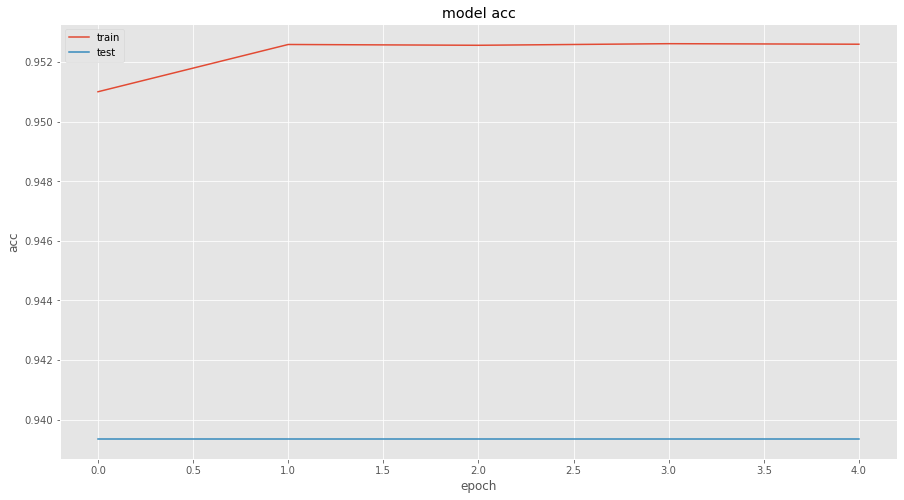

In [81]:
metric = "acc"
plt.figure()
plt.plot(history_lstm.history[metric])
plt.plot(history_lstm.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "test"], loc="best")
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import classification_report
predict_y = model_lstm.predict(x_test)
print(predict_y.shape)

In [83]:
target_names = ['No data','Agresion','Sustracción']
report_test = classification_report(Y_test, np.around(predict_y),target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

     No data       1.00      1.00      1.00     46910
    Agresion       0.60      1.00      0.75      6102
 Sustracción       0.00      0.00      0.00      4012

   micro avg       0.93      0.93      0.93     57024
   macro avg       0.53      0.67      0.58     57024
weighted avg       0.89      0.93      0.90     57024
 samples avg       0.93      0.93      0.93     57024



In [84]:
predict_y_val = model_lstm.predict(x_val)
print(predict_y_val.shape)

(56736, 3)


In [85]:
target_names = ['No data','Agresion','Sustracción']
report_test = classification_report(Y_val, np.around(predict_y_val),target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

     No data       1.00      1.00      1.00     46518
    Agresion       0.59      1.00      0.74      6023
 Sustracción       0.00      0.00      0.00      4195

   micro avg       0.93      0.93      0.93     56736
   macro avg       0.53      0.67      0.58     56736
weighted avg       0.88      0.93      0.90     56736
 samples avg       0.93      0.93      0.93     56736



In [86]:
predict_y = np.around(predict_y)
predict_y_val = np.around(predict_y_val)

predict_y = np.argmax(predict_y, axis=1)
predict_y

predict_y_val = np.argmax(predict_y_val, axis=1)
predict_y_val


dataset_test = pd.DataFrame({'Predict_Crime_Type': predict_y, 'Crime_type_test': np.argmax(Y_test, axis=1)})
dataset_val = pd.DataFrame({'Predict_Crime_Type': predict_y_val, 'Crime_type_test': np.argmax(Y_val, axis=1)})
#print(dataset_test)
#print(dataset_val)

dataset_join = dataset_test.append(dataset_val)
#dataset_join = dataset_join.values
dataset_join

In [89]:
dataset_join.to_csv(r'.. /data/type_crime_lstm.csv',index=False)